<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/SO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
!pip install pystan==2.18.0.0
!sudo pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(4384, 2)


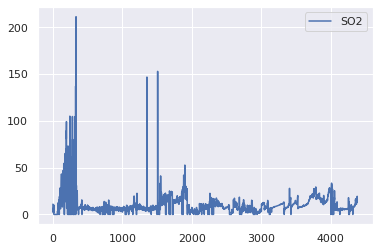

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [379]:
import pandas 
# load the car sales dataset
from pandas import read_excel
from matplotlib import pyplot
# load data
df = read_excel("Veri Detayları12.11.2022 14_08_57 (1).xlsx",header=0)
# summarize shape
print(df.shape)
df.plot()
pyplot.show()


# show first few rows
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet
# load data
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)


          ds       yhat  yhat_lower  yhat_upper
0 2015-01-01  13.313776    1.373001   24.552381
1 2015-02-01  12.860789    0.823989   25.207056
2 2015-03-01  11.782151   -0.194633   24.092852
3 2015-04-01  12.505375    1.324387   23.891436
4 2015-05-01  16.207659    3.633335   28.383228


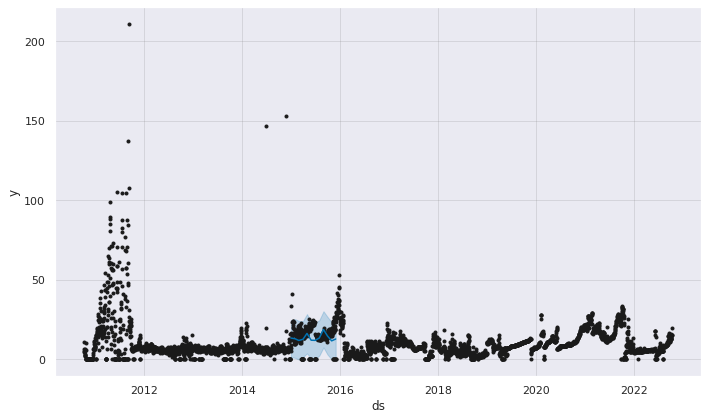

In [380]:
# make an in-sample forecast

from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2015-%01d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [381]:
train = df.drop(df.index[-12:])
print(train.tail())

             ds      y
4367 2022-09-26  14.50
4368 2022-09-27  13.16
4369 2022-09-28  11.71
4370 2022-09-29  10.83
4371 2022-09-30  11.76


MAE: 2.278


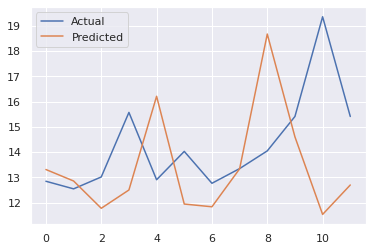

In [382]:
from sklearn.metrics import mean_absolute_error
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true,y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [383]:
!pip install pmdarima
!pip install arch
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima.arima
from pmdarima.arima import auto_arima
from arch import arch_model
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [384]:
df = read_excel("Veri Detayları12.11.2022 14_08_57 (1).xlsx",header=0)
df.index = pd.to_datetime(df["Tarih"])
del df["Tarih"]

In [385]:
print(df.head())
print(df.tail())

              SO2
Tarih            
2010-10-12  10.95
2010-10-13   6.69
2010-10-14   4.61
2010-10-15   5.38
2010-10-16   2.58
              SO2
Tarih            
2022-10-08  13.35
2022-10-09  14.05
2022-10-10  15.41
2022-10-11  19.35
2022-10-12  15.41


In [386]:
train, test =  sklearn.model_selection.train_test_split(df, test_size = 0.2, shuffle=False)

In [387]:
print(train.tail(), train.shape)
print(test.head(), test.shape)

              SO2
Tarih            
2020-05-14  11.93
2020-05-15  12.05
2020-05-16  11.88
2020-05-17  11.62
2020-05-18  11.55 (3507, 1)
              SO2
Tarih            
2020-05-19  11.44
2020-05-20  11.43
2020-05-21  11.16
2020-05-22  10.83
2020-05-23  10.62 (877, 1)


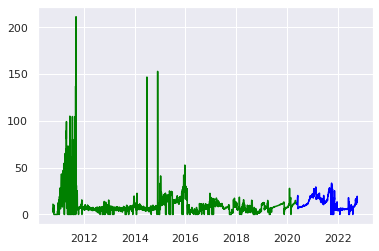

In [388]:
plt.plot(train, color="green")
plt.plot(test, color="blue")
plt.show()

In [390]:
model = SARIMAX(train["SO2"], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  inferred_freq = False


In [391]:
tahmin = model.forecast(steps=test.shape[0])

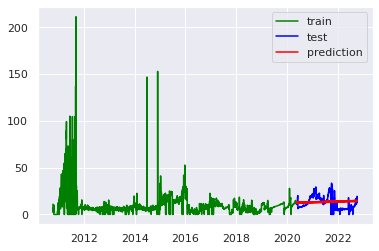

In [392]:
plt.plot(train, color="green", label="train")
plt.plot(test, color="blue", label="test")
plt.plot(tahmin, color ="red", label="prediction")
plt.legend()
plt.show()

In [393]:
train["index2"] = list(range(1, len(train)+1))
test["index2"] = list(range(len(train)+1, len(train)+len(test)+1))

In [396]:
!python3 -m pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras import callbacks

model = Sequential()

model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="RMSprop", loss="mean_absolute_error", metrics=["mse"])

class myCB(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("val_loss") < 40:
            print("İstenilen Seviyeye Ulaşıldı... Loss: {} Durduruluyor!".format(logs.get("val_loss")))
            print("Toplam Epoch Sayısı: " +  str(epoch))
            self.model.stop_training = True

cb = myCB()
model.fit(train.index2, train["SO2"], epochs=250, callbacks=[cb], verbose=0, validation_data=(test.index2, test["SO2"]))
tahmin_ysa = model.predict(test.index2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
İstenilen Seviyeye Ulaşıldı... Loss: 24.474472045898438 Durduruluyor!
Toplam Epoch Sayısı: 0
28/28 [==============================] - 0s 4ms/step


110/110 [==============================] - 0s 2ms/step


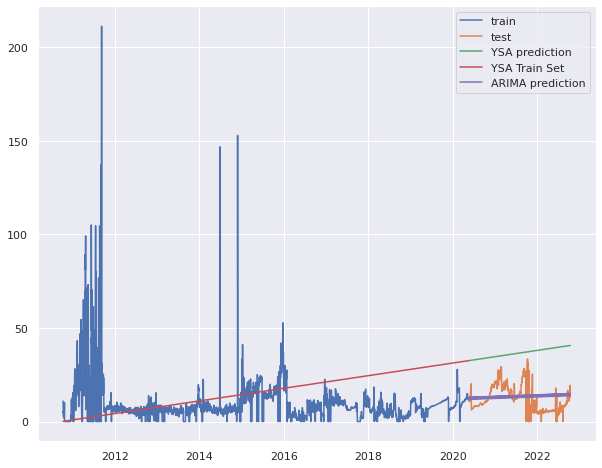

In [398]:
tahmin_ysa = pd.DataFrame(data=tahmin_ysa, index=test.index, columns=[df.columns[0]])
act = model.predict(train.index2)
act_ysa = pd.DataFrame(data=act, index=train.index, columns=[df.columns[0]])
plt.figure(figsize=(10, 8))
plt.plot(train.SO2 , label="train")
plt.plot(test.SO2, label="test")
plt.plot(tahmin_ysa, label= "YSA prediction")
plt.plot(act_ysa, label="YSA Train Set")
plt.plot(tahmin, label="ARIMA prediction")
plt.legend()
plt.plot()
plt.legend()
plt.show()

In [400]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Yapay Sinir Ağı MSE:", mean_squared_error(test.SO2, tahmin_ysa.SO2))
print("ARIMA MSE:", mean_squared_error(test.SO2, tahmin))

print("Yapay Sinir Ağı MAE:", mean_absolute_error(test.SO2, tahmin_ysa.SO2))
print("ARIMA MAE:", (mean_absolute_error(test.SO2, tahmin)))

Yapay Sinir Ağı MSE: 24.47447376281669
ARIMA MSE: 6.329255773904008
Yapay Sinir Ağı MAE: 24.47447376281669
ARIMA MAE: 6.329255773904008


ValueError: ignored